# **Sleep Health and Lifestyle**

### Analysis of Factors Influencing Sleep Quality

This project explores how different habits and lifestyle factors, such as stress, physical activity, age, and heart rate, influence sleep quality. The goal is to identify patterns and correlations, and to build predictive models to understand what most affects sleep-related well-being.




## **Setup and Imports**



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import io
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


# Statistical analysis
from scipy import stats
from scipy.stats import pearsonr, ttest_ind, f_oneway, chi2_contingency

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Configure visualization settings
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


Importing the data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Sleep_health_and_lifestyle_dataset.xlsx to Sleep_health_and_lifestyle_dataset (2).xlsx


Looking at the data

In [ ]:
display(df.head())


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder,age_group,short_sleep,cluster,systolic_bp,diastolic_bp
3,4,Male,28.0,Sales Representative,5.9,4.0,30.0,8,Obese,140/90,85.0,3000.0,Sleep Apnea,18-35,1,1,140,90
4,5,Male,28.0,Sales Representative,5.9,4.0,30.0,8,Obese,140/90,85.0,3000.0,Sleep Apnea,18-35,1,1,140,90
5,6,Male,28.0,Software Engineer,5.9,4.0,30.0,8,Obese,140/90,85.0,3000.0,Insomnia,18-35,1,1,140,90
6,7,Male,29.0,Teacher,6.3,6.0,40.0,7,Obese,140/90,82.0,3500.0,Insomnia,18-35,0,1,140,90
16,17,Female,29.0,Nurse,6.5,5.0,40.0,7,Normal Weight,132/87,80.0,4000.0,Sleep Apnea,18-35,0,1,132,87


## **Data cleaning**

Checking for missing data


In [ ]:
print("Missing values for column:")
print(df.isnull().sum())



Missing values for column:
Person ID                  0
Gender                     0
Age                        0
Occupation                 0
Sleep Duration             0
Quality of Sleep           0
Physical Activity Level    0
Stress Level               0
BMI Category               0
Blood Pressure             0
Heart Rate                 0
Daily Steps                0
Sleep Disorder             0
age_group                  0
systolic_bp                0
diastolic_bp               0
short_sleep                0
high_stress                0
low_activity               0
poor_sleep_quality         0
bmi_risk                   0
has_disorder               0
dtype: int64


Removing null values from the data

In [ ]:
df = df.dropna()


Dropping duplicates

In [ ]:
df.drop_duplicates()



,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,...,Sleep Disorder,age_group,systolic_bp,diastolic_bp,short_sleep,high_stress,low_activity,poor_sleep_quality,bmi_risk,has_disorder
3,4,Male,28.0,Sales Representative,5.9,4.0,30.0,8,Obese,140/90,...,Sleep Apnea,18-35,140,90,1,1,0,1,High Risk,1
4,5,Male,28.0,Sales Representative,5.9,4.0,30.0,8,Obese,140/90,...,Sleep Apnea,18-35,140,90,1,1,0,1,High Risk,1
5,6,Male,28.0,Software Engineer,5.9,4.0,30.0,8,Obese,140/90,...,Insomnia,18-35,140,90,1,1,0,1,High Risk,1
6,7,Male,29.0,Teacher,6.3,6.0,40.0,7,Obese,140/90,...,Insomnia,18-35,140,90,0,0,0,0,High Risk,1
16,17,Female,29.0,Nurse,6.5,5.0,40.0,7,Normal Weight,132/87,...,Sleep Apnea,18-35,132,87,0,0,0,1,Low Risk,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59.0,Nurse,8.1,9.0,75.0,3,Overweight,140/95,...,Sleep Apnea,51-65,140,95,0,0,0,0,Medium Risk,1
370,371,Female,59.0,Nurse,8.0,9.0,75.0,3,Overweight,140/95,...,Sleep Apnea,51-65,140,95,0,0,0,0,Medium Risk,1
371,372,Female,59.0,Nurse,8.1,9.0,75.0,3,Overweight,140/95,...,Sleep Apnea,51-65,140,95,0,0,0,0,Medium Risk,1
372,373,Female,59.0,Nurse,8.1,9.0,75.0,3,Overweight,140/95,...,Sleep Apnea,51-65,140,95,0,0,0,0,Medium Risk,1


Outlier Detection

In [ ]:
print("\n2. Outlier Detection:")
num_cols = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Stress Level',
            'Physical Activity Level', 'Heart Rate', 'Daily Steps']

# Outlier detection using IQR
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in '{col}': {len(outliers)} found")
    # Optionally display the outliers
    # display(outliers)


2. Outlier Detection:
Outliers in 'Age': 6 found
Outliers in 'Sleep Duration': 0 found
Outliers in 'Quality of Sleep': 0 found
Outliers in 'Stress Level': 0 found
Outliers in 'Physical Activity Level': 0 found
Outliers in 'Heart Rate': 2 found
Outliers in 'Daily Steps': 43 found


Checking the data type of the columns

In [ ]:
print(df.dtypes)


Person ID                     int64
Gender                       object
Age                         float64
Occupation                   object
Sleep Duration              float64
Quality of Sleep            float64
Physical Activity Level     float64
Stress Level                  int64
BMI Category                 object
Blood Pressure               object
Heart Rate                  float64
Daily Steps                 float64
Sleep Disorder               object
age_group                  category
systolic_bp                   int64
diastolic_bp                  int64
short_sleep                   int64
high_stress                   int64
low_activity                  int64
poor_sleep_quality            int64
bmi_risk                     object
has_disorder                  int64
dtype: object


Creation of an age group


In [ ]:
bins = [0, 18, 35, 50, 65, 120]
labels = ['<18', '18-35', '36-50', '51-65', '65+']
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

Split blood pressure into systolic and diastolic




In [ ]:
df[['systolic_bp','diastolic_bp']] = df['Blood Pressure'].str.split('/', expand=True)
df['systolic_bp'] = pd.to_numeric(df['systolic_bp'], errors='coerce')
df['diastolic_bp'] = pd.to_numeric(df['diastolic_bp'], errors='coerce')


Binary Indicators

In [ ]:
df['short_sleep'] = (df['Sleep Duration'] < 6).astype(int)
df['high_stress'] = (df['Stress Level'] > df['Stress Level'].median()).astype(int)
df['low_activity'] = (df['Physical Activity Level'] < 30).astype(int)
df['poor_sleep_quality'] = (df['Quality of Sleep'] < 6).astype(int)



BMI risk category

In [ ]:
bmi_risk_map = {
    'Normal': 'Low Risk',
    'Normal Weight': 'Low Risk',
    'Overweight': 'Medium Risk',
    'Obese': 'High Risk'
}
df['bmi_risk'] = df['BMI Category'].map(bmi_risk_map)

### **Exploratory Data Analysis**

Summary Statistics


In [ ]:
print("\n1. Summary Statistics by BMI Category:")
summary_stats = df.groupby('BMI Category')[['Sleep Duration', 'Quality of Sleep', 'Stress Level']].agg(['mean', 'median', 'std'])
display(summary_stats.round(2))



1. Summary Statistics by BMI Category:


Sleep Duration              Quality of Sleep               \
                        mean median   std             mean median   std   
BMI Category                                                              
Normal                  7.31    7.4  0.70             7.67    8.0  0.89   
Normal Weight           6.43    6.4  0.06             5.00    5.0  0.00   
Obese                   6.96    7.3  0.88             6.40    7.0  1.90   
Overweight              6.83    6.5  0.80             6.99    7.0  1.33   

              Stress Level               
                      mean median   std  
BMI Category                             
Normal                5.25    5.0  1.48  
Normal Weight         7.00    7.0  0.00  
Obese                 5.70    5.0  1.95  
Overweight            5.64    7.0  2.04

People with a normal BMI tend to have better sleep and lower stress, while those who are overweight or obese show slightly shorter sleep duration and lower quality. The “Normal Weight” group stood out for having higher stress and poorer sleep quality.

Distribution of the variables


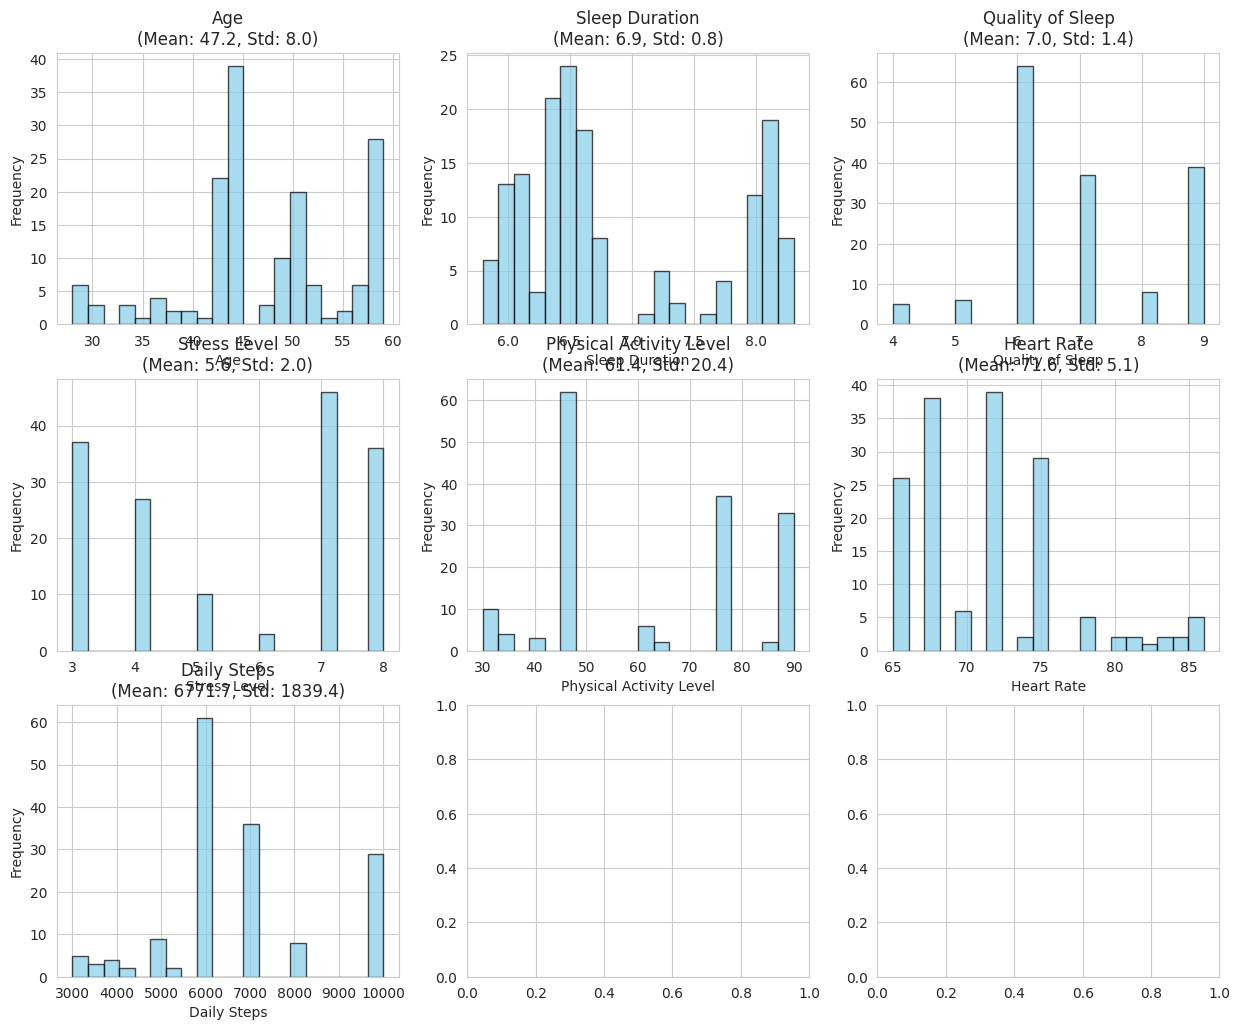

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(num_cols):
    axes[idx].hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col}\n(Mean: {df[col].mean():.1f}, Std: {df[col].std():.1f})')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Frequency')


The distribution of sleep duration tends to be concentrated between 6 and 8 hours.

Sleep Duration Analysis

   - Gender comparison: t=-2.440, p=0.0158
     → Significant difference found!

4. Sleep Duration by BMI Category:


,mean,std,count
BMI Category,,,
Normal,7.31,0.70,12
Normal Weight,6.43,0.06,3
Obese,6.96,0.88,10
Overweight,6.83,0.80,134


   - ANOVA test: F=1.704, p=0.1686


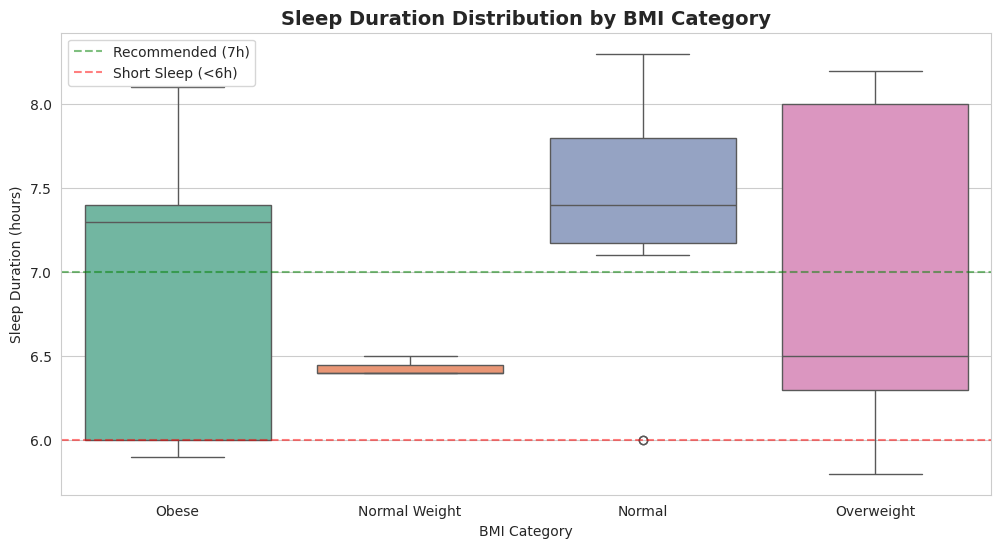

In [ ]:
# By Gender
sleep_by_gender = df.groupby('Gender')['Sleep Duration'].mean().sort_values()

# Statistical test for gender difference
male_sleep = df[df['Gender'] == 'Male']['Sleep Duration']
female_sleep = df[df['Gender'] == 'Female']['Sleep Duration']
t_stat, p_val = ttest_ind(male_sleep, female_sleep)
print(f"   - Gender comparison: t={t_stat:.3f}, p={p_val:.4f}")
if p_val < 0.05:
    print(f"     → Significant difference found!")
else:
    print(f"     → No significant difference")

# By BMI Category
print("\n4. Sleep Duration by BMI Category:")
sleep_by_bmi = df.groupby('BMI Category')['Sleep Duration'].agg(['mean', 'std', 'count'])
display(sleep_by_bmi.round(2))

# ANOVA test
groups = [group['Sleep Duration'].values for name, group in df.groupby('BMI Category')]
f_stat, p_val = f_oneway(*groups)
print(f"   - ANOVA test: F={f_stat:.3f}, p={p_val:.4f}")

plt.figure(figsize=(12, 6))
sns.boxplot(x='BMI Category', y='Sleep Duration', data=df, palette='Set2', hue='BMI Category', legend=False)
plt.title('Sleep Duration Distribution by BMI Category', fontsize=14, fontweight='bold')
plt.ylabel('Sleep Duration (hours)')
plt.xlabel('BMI Category')
plt.axhline(y=7, color='green', linestyle='--', alpha=0.5, label='Recommended (7h)')
plt.axhline(y=6, color='red', linestyle='--', alpha=0.5, label='Short Sleep (<6h)')
plt.legend()
plt.show()

Sleep duration differs by gender but not by BMI group.

People with normal BMI generally sleep the longest and most consistently, around 6.5–7 hours, while overweight and obese individuals show greater variation, with some sleeping well and others less than 6 hours.

Overall, most groups are near the 7-hour recommendation, but overweight and obese people tend to have shorter and more variable sleep.


Sleep Quality and Disorders

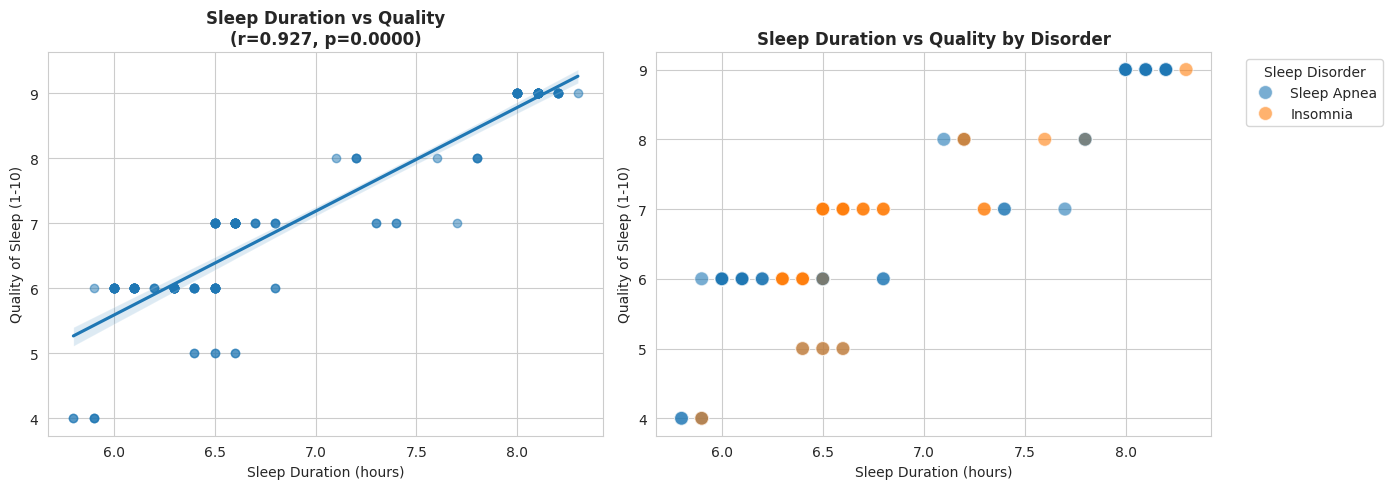

   - Correlation: r=0.927, p=0.0000

6. Sleep Disorders Distribution:
Sleep Disorder
Sleep Apnea    83
Insomnia       76
Name: count, dtype: int64


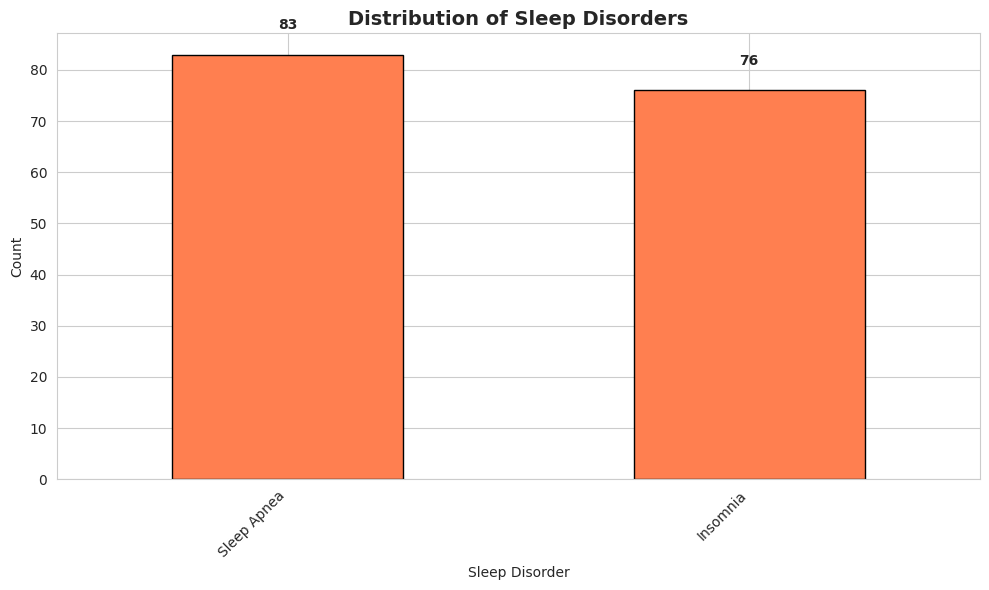

In [ ]:
# Relationship between sleep duration and quality
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Scatter plot with regression
sns.regplot(x='Sleep Duration', y='Quality of Sleep', data=df, ax=axes[0], scatter_kws={'alpha':0.5})
corr, p_value = pearsonr(df['Sleep Duration'].dropna(), df['Quality of Sleep'].dropna())
axes[0].set_title(f'Sleep Duration vs Quality\n(r={corr:.3f}, p={p_value:.4f})', fontweight='bold')
axes[0].set_xlabel('Sleep Duration (hours)')
axes[0].set_ylabel('Quality of Sleep (1-10)')

# By Sleep Disorder
sns.scatterplot(x='Sleep Duration', y='Quality of Sleep', hue='Sleep Disorder',
                data=df, ax=axes[1], s=100, alpha=0.6)
axes[1].set_title('Sleep Duration vs Quality by Disorder', fontweight='bold')
axes[1].set_xlabel('Sleep Duration (hours)')
axes[1].set_ylabel('Quality of Sleep (1-10)')
axes[1].legend(title='Sleep Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

print(f"   - Correlation: r={corr:.3f}, p={p_value:.4f}")

# Sleep disorders distribution
print("\n6. Sleep Disorders Distribution:")
disorder_counts = df['Sleep Disorder'].value_counts()
print(disorder_counts)

plt.figure(figsize=(10, 6))
disorder_counts.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Distribution of Sleep Disorders', fontsize=14, fontweight='bold')
plt.xlabel('Sleep Disorder')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(disorder_counts.values):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

Strong positive correlation: Longer sleep is associated with better sleep quality (r = 0.927, p < 0.001).

By disorder: Both insomnia and sleep apnea follow this trend, but insomnia sufferers cluster at shorter duration and lower quality, while sleep apnea individuals are more spread across medium to higher durations.

Overall: Sleep duration strongly predicts sleep quality across disorders. Sleep apnea is slightly more common than insomnia, but both are nearly equally represented in the population.

Stress Analysis


7. Stress Level Analysis:


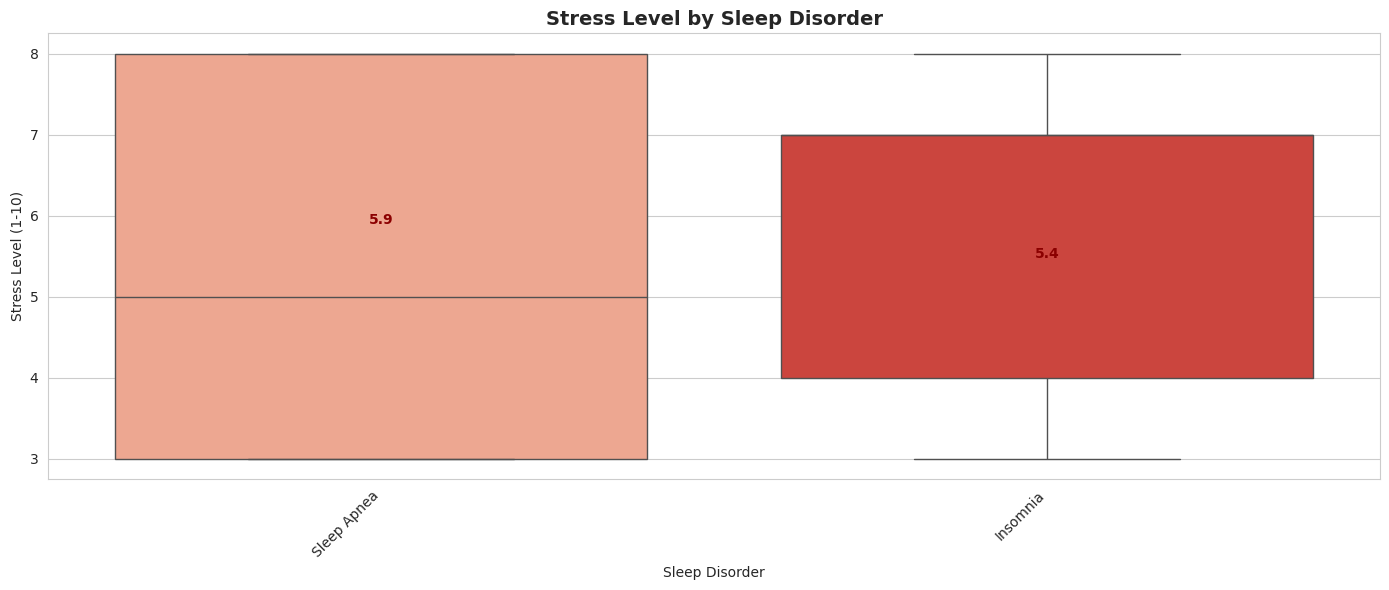

,mean,std,count
Sleep Disorder,,,
Insomnia,5.86,1.47,76
Sleep Apnea,5.45,2.35,83


In [ ]:
print("\n7. Stress Level Analysis:")

plt.figure(figsize=(14, 6))

# Stress by sleep disorder
sns.boxplot(x='Sleep Disorder', y='Stress Level', data=df, palette='Reds', hue='Sleep Disorder', legend=False)
plt.title('Stress Level by Sleep Disorder', fontsize=14, fontweight='bold')
plt.xlabel('Sleep Disorder')
plt.ylabel('Stress Level (1-10)')
plt.xticks(rotation=45, ha='right')

# Add mean values
means = df.groupby('Sleep Disorder')['Stress Level'].mean()
positions = range(len(means))
for pos, mean_val in zip(positions, means):
    plt.text(pos, mean_val, f'{mean_val:.1f}', ha='center', va='bottom',
             fontweight='bold', color='darkred')

plt.tight_layout()
plt.show()

# Statistical comparison
stress_by_disorder = df.groupby('Sleep Disorder')['Stress Level'].agg(['mean', 'std', 'count'])
display(stress_by_disorder.round(2))

Patients with insomnia have a slightly higher mean, but sleep apnea shows greater variability among individuals.

Physical Activity and Health


8. Physical Activity Analysis:


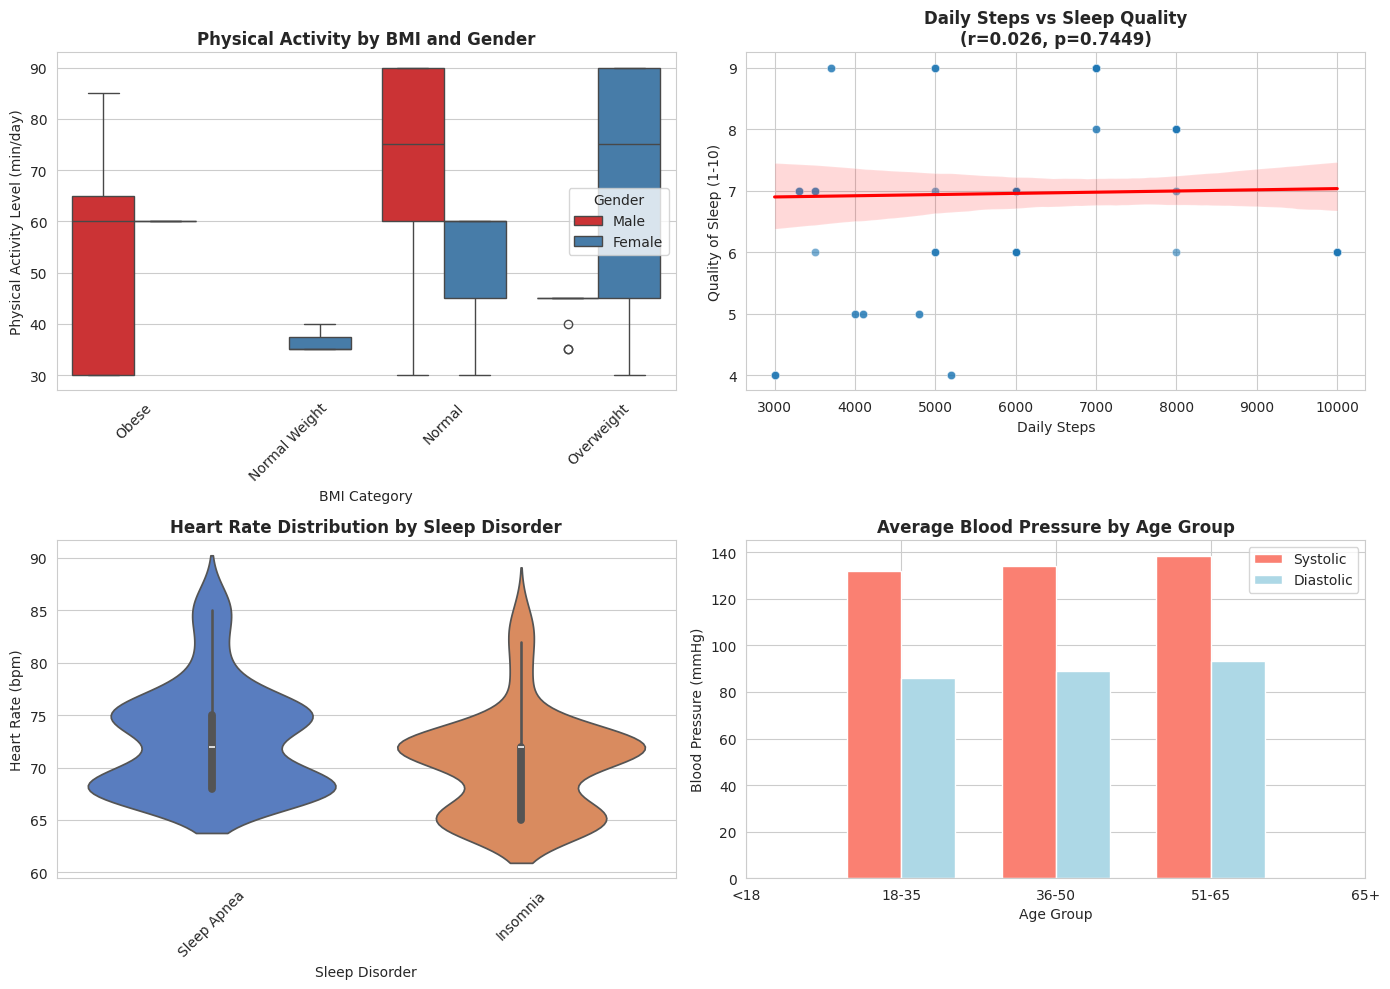

In [ ]:
print("\n8. Physical Activity Analysis:")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Physical Activity by BMI and Gender
sns.boxplot(x='BMI Category', y='Physical Activity Level', hue='Gender',
            data=df, ax=axes[0, 0], palette='Set1')
axes[0, 0].set_title('Physical Activity by BMI and Gender', fontweight='bold')
axes[0, 0].set_xlabel('BMI Category')
axes[0, 0].set_ylabel('Physical Activity Level (min/day)')
axes[0, 0].tick_params(axis='x', rotation=45)

# Daily Steps vs Sleep Quality
sns.scatterplot(x='Daily Steps', y='Quality of Sleep', data=df, ax=axes[0, 1], alpha=0.6)
sns.regplot(x='Daily Steps', y='Quality of Sleep', data=df, ax=axes[0, 1],
            scatter=False, color='red')
corr_steps, p_steps = pearsonr(df['Daily Steps'].dropna(), df['Quality of Sleep'].dropna())
axes[0, 1].set_title(f'Daily Steps vs Sleep Quality\n(r={corr_steps:.3f}, p={p_steps:.4f})',
                     fontweight='bold')
axes[0, 1].set_xlabel('Daily Steps')
axes[0, 1].set_ylabel('Quality of Sleep (1-10)')

# Heart Rate by Sleep Disorder
sns.violinplot(x='Sleep Disorder', y='Heart Rate', data=df, ax=axes[1, 0], palette='muted', hue='Sleep Disorder', legend=False)
axes[1, 0].set_title('Heart Rate Distribution by Sleep Disorder', fontweight='bold')
axes[1, 0].set_xlabel('Sleep Disorder')
axes[1, 0].set_ylabel('Heart Rate (bpm)')
axes[1, 0].tick_params(axis='x', rotation=45)

# Blood Pressure by Age Group
bp_by_age = df.groupby('age_group', observed=False)[['systolic_bp', 'diastolic_bp']].mean()
x_pos = np.arange(len(bp_by_age))
width = 0.35
axes[1, 1].bar(x_pos - width/2, bp_by_age['systolic_bp'], width, label='Systolic', color='salmon')
axes[1, 1].bar(x_pos + width/2, bp_by_age['diastolic_bp'], width, label='Diastolic', color='lightblue')
axes[1, 1].set_xlabel('Age Group')
axes[1, 1].set_ylabel('Blood Pressure (mmHg)')
axes[1, 1].set_title('Average Blood Pressure by Age Group', fontweight='bold')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(bp_by_age.index)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

Gender and BMI differences influence physical activity, sleep quality is not related to daily steps, sleep apnea shows greater heart rate variability, and blood pressure increases with age.**


What is the relationship between sleep duration, sleep quality, and sleep disorders?

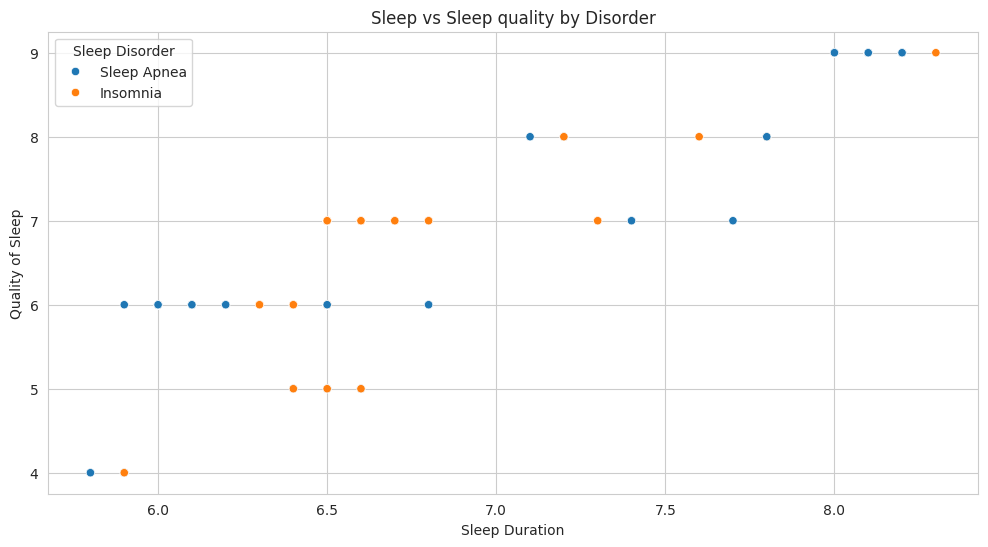

In [ ]:
sns.scatterplot(x='Sleep Duration', y='Quality of Sleep', hue='Sleep Disorder', data=df)
plt.title("Sleep vs Sleep quality by Disorder")
plt.show()

The relationship between sleep duration, sleep quality, and sleep disorders shows that both Sleep Apnea and Insomnia patients generally follow similar trends, where longer sleep is associated with better sleep quality. However, subtle differences exist: Sleep Apnea patients tend to sleep slightly longer (around 7–8 hours) with more consistent quality, while Insomnia patients often sleep less (around 6–7 hours) and exhibit greater variability in sleep quality. Overall, Sleep Apnea is associated with more stable and slightly longer sleep compared to Insomnia.**


What's the relationship between stress and sleep disorders?

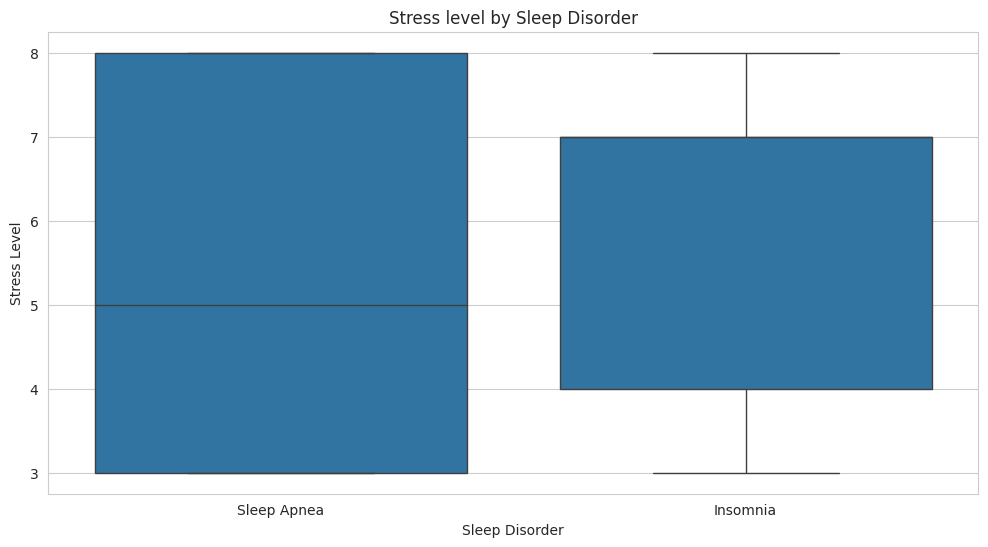

In [ ]:
sns.boxplot(x='Sleep Disorder', y='Stress Level', data=df)
plt.title("Stress level by Sleep Disorder")
plt.show()

Both groups show similar minimum and maximum stress levels, but Insomnia is associated with a higher median stress and lower variability. This suggests that stress tends to be consistently higher in individuals with Insomnia, whereas in Sleep Apnea, stress levels vary more between individuals.**


What's the relationship between physical activity, daily steps, and sleep quality?

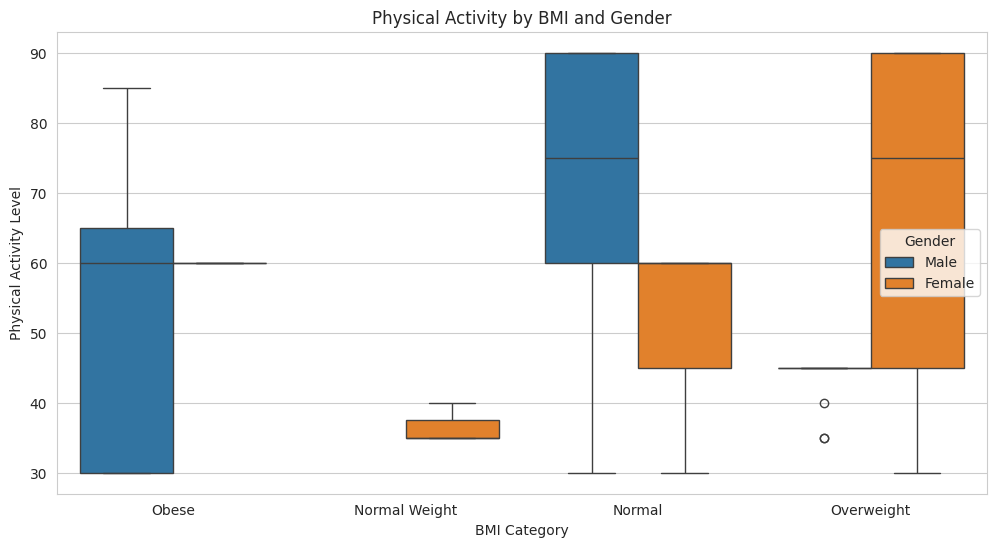

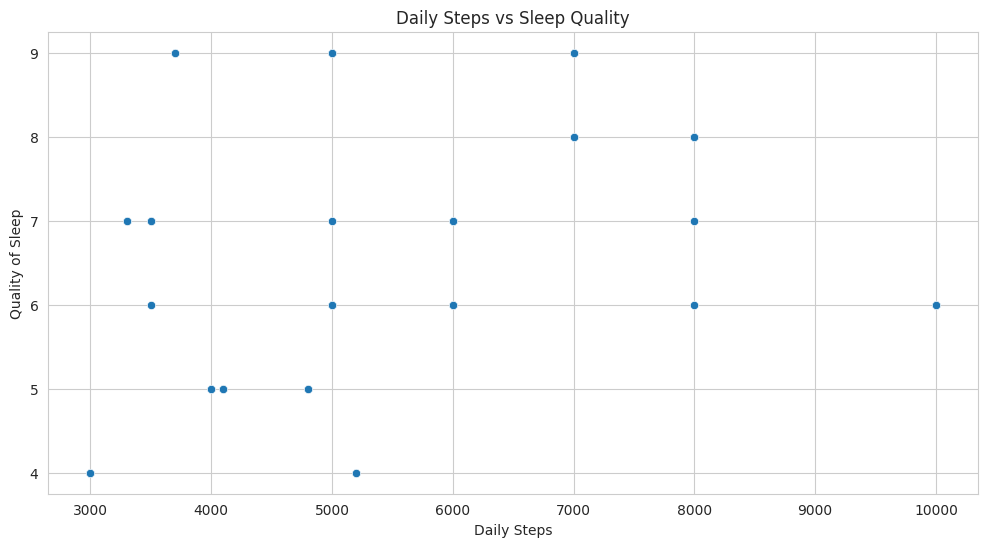

In [ ]:
sns.boxplot(x='BMI Category', y='Physical Activity Level', hue='Gender', data=df)
plt.title("Physical Activity by BMI and Gender")
plt.show()

sns.scatterplot(x='Daily Steps', y='Quality of Sleep', data=df)
plt.title("Daily Steps vs Sleep Quality")
plt.show()

The relationship between physical activity, daily steps, and sleep quality varies by BMI and gender. Normal-weight men are the most physically active, while normal-weight women show moderate activity. Overweight women are highly active, whereas overweight men are less active with some outliers. Obese men show high variability in activity, and women are not represented in this category. Overall, physical activity differs by both BMI and gender, but no direct link to daily steps or sleep quality is indicated from this data.**


### **Correlation Analysis**


9. Correlation Analysis:


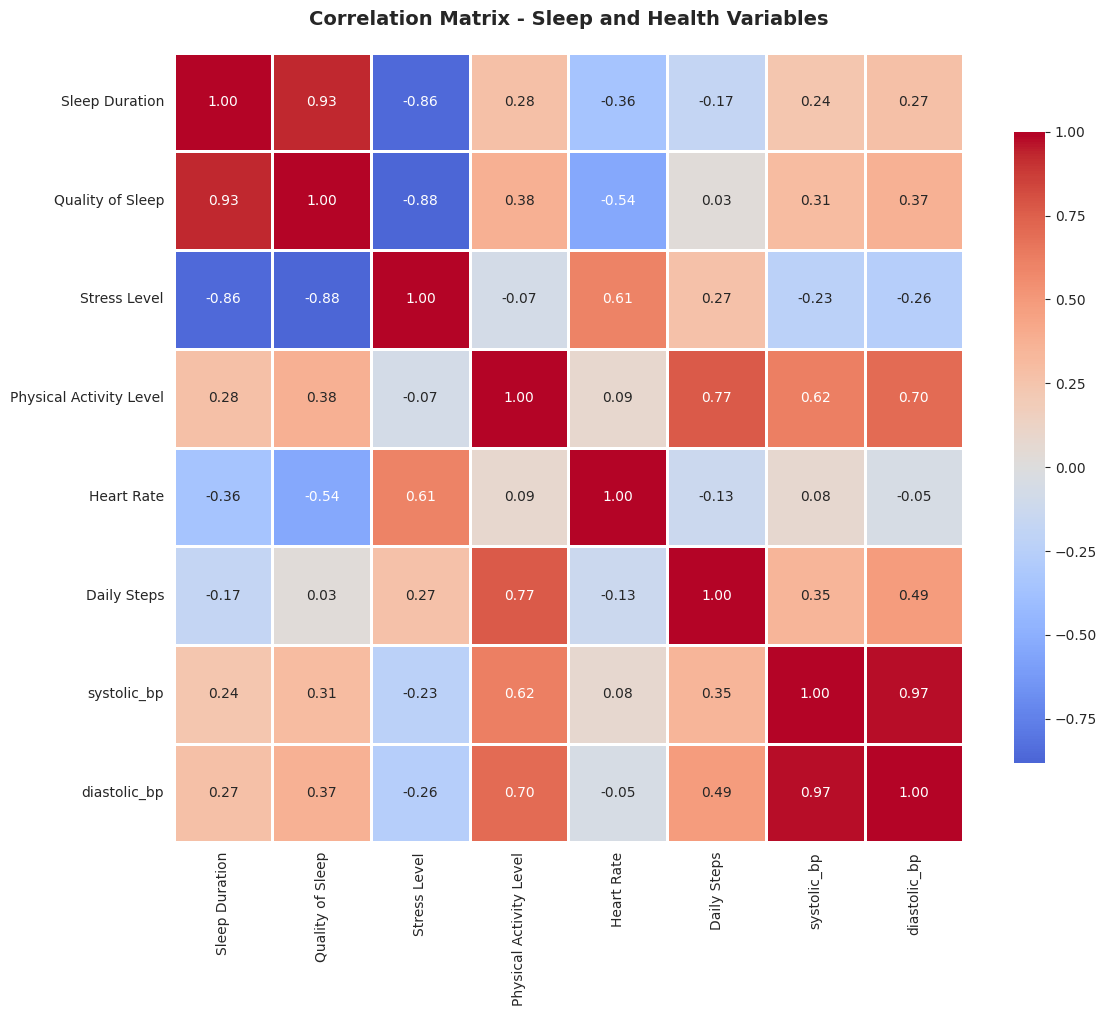


   Strongest correlations (|r| > 0.3):
   - systolic_bp ↔ diastolic_bp: r = 0.972
   - Sleep Duration ↔ Quality of Sleep: r = 0.927
   - Quality of Sleep ↔ Stress Level: r = -0.883
   - Sleep Duration ↔ Stress Level: r = -0.859
   - Physical Activity Level ↔ Daily Steps: r = 0.772
   - Physical Activity Level ↔ diastolic_bp: r = 0.703
   - Physical Activity Level ↔ systolic_bp: r = 0.622
   - Stress Level ↔ Heart Rate: r = 0.606
   - Quality of Sleep ↔ Heart Rate: r = -0.539
   - Daily Steps ↔ diastolic_bp: r = 0.486

10. Risk Analysis - Short Sleep (<6 hours):
   - Overall short sleep prevalence: 3.8%


/tmp/ipython-input-3788048272.py:43: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  risk_matrix = df.pivot_table(index='age_group', columns='BMI Category',


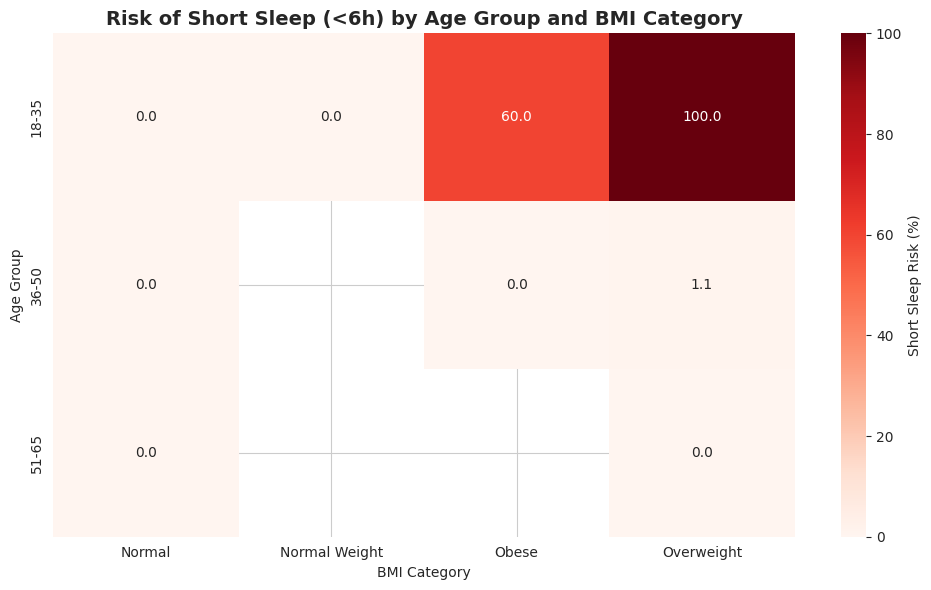


   Top 5 high-risk groups (Age × BMI):


mean  count    risk_pct
age_group BMI Category                              
18-35     Overweight     1.000000      2  100.000000
          Obese          0.600000      5   60.000000
36-50     Overweight     0.011494     87    1.149425
18-35     Normal         0.000000      3    0.000000
          Normal Weight  0.000000      3    0.000000


11. Combined Risk Factors:


,short_sleep,high_stress,low_activity,count,percentage
0,0,0,0,123,77.358491
1,0,1,0,30,18.867925
2,1,1,0,6,3.773585


In [ ]:
print("\n9. Correlation Analysis:")

numeric_features = ['Sleep Duration', 'Quality of Sleep', 'Stress Level',
                   'Physical Activity Level', 'Heart Rate', 'Daily Steps',
                   'systolic_bp', 'diastolic_bp']

correlation_matrix = df[numeric_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Sleep and Health Variables',
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Print strongest correlations
print("\n   Strongest correlations (|r| > 0.3):")
corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if abs(corr_val) > 0.3:
            corr_pairs.append((correlation_matrix.columns[i],
                              correlation_matrix.columns[j],
                              corr_val))

corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
for var1, var2, corr_val in corr_pairs[:10]:
    print(f"   - {var1} ↔ {var2}: r = {corr_val:.3f}")

# =============================================================================
# 11. RISK ANALYSIS - SHORT SLEEP
# =============================================================================

print("\n10. Risk Analysis - Short Sleep (<6 hours):")

# Overall short sleep prevalence
short_sleep_pct = df['short_sleep'].mean() * 100
print(f"   - Overall short sleep prevalence: {short_sleep_pct:.1f}%")

# Risk by age and BMI
risk_matrix = df.pivot_table(index='age_group', columns='BMI Category',
                             values='short_sleep', aggfunc='mean')

plt.figure(figsize=(10, 6))
sns.heatmap(risk_matrix * 100, annot=True, fmt='.1f', cmap='Reds',
            cbar_kws={'label': 'Short Sleep Risk (%)'})
plt.title('Risk of Short Sleep (<6h) by Age Group and BMI Category',
          fontsize=14, fontweight='bold')
plt.xlabel('BMI Category')
plt.ylabel('Age Group')
plt.tight_layout()
plt.show()

# High-risk groups
print("\n   Top 5 high-risk groups (Age × BMI):")
risk_by_group = df.groupby(['age_group', 'BMI Category'], observed=False)['short_sleep'].agg(['mean', 'count'])
risk_by_group = risk_by_group.sort_values('mean', ascending=False)
risk_by_group['risk_pct'] = risk_by_group['mean'] * 100
display(risk_by_group.head())

# Multiple risk factors
print("\n11. Combined Risk Factors:")
risk_combo = df.groupby(['short_sleep', 'high_stress', 'low_activity']).size().reset_index(name='count')
risk_combo['percentage'] = risk_combo['count'] / len(df) * 100
risk_combo = risk_combo.sort_values('count', ascending=False)
display(risk_combo)

Longer sleep is linked to better sleep quality and lower stress, while higher stress relates to higher heart rate. Physical activity correlates with daily steps and moderately with blood pressure. Short sleep (<6h) is rare overall (3.8%) but concentrated in young overweight and obese adults. Most people (77%) have no combined risk factors, while only a small portion faces multiple risks (short sleep, high stress, low activity).

### **Clustering Analysis**


12. Clustering Analysis:


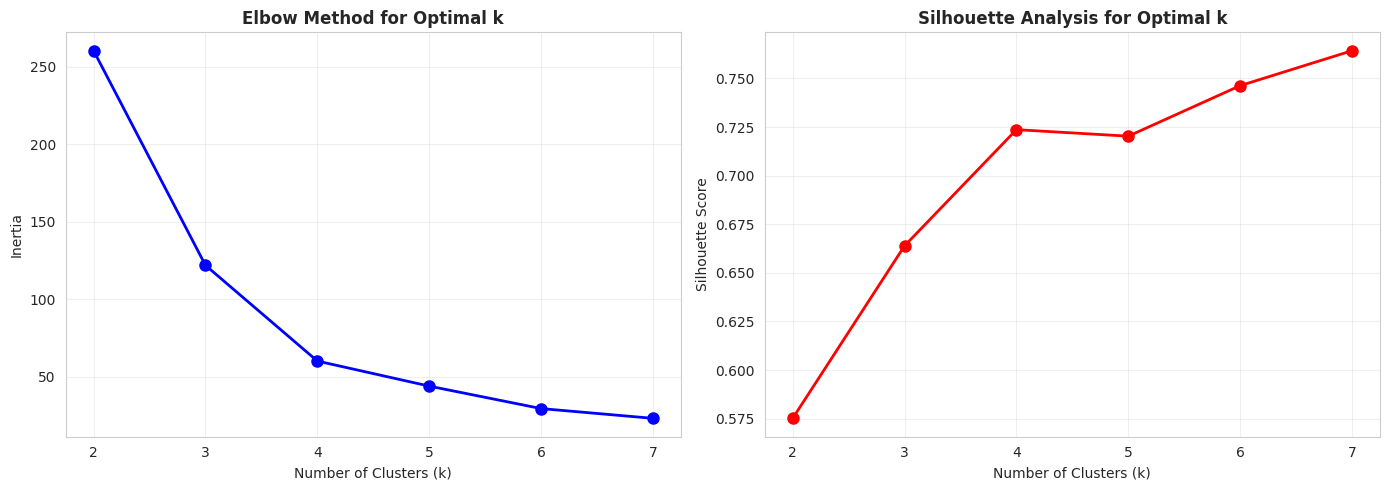


   - Optimal clusters: 3
   - Silhouette score: 0.664

   Cluster Profiles:


,Sleep Duration,Quality of Sleep,Stress Level,Physical Activity Level
cluster,,,,
0,6.50,6.24,6.12,43.59
1,7.98,8.79,3.40,74.48
2,6.07,6.00,8.00,90.00


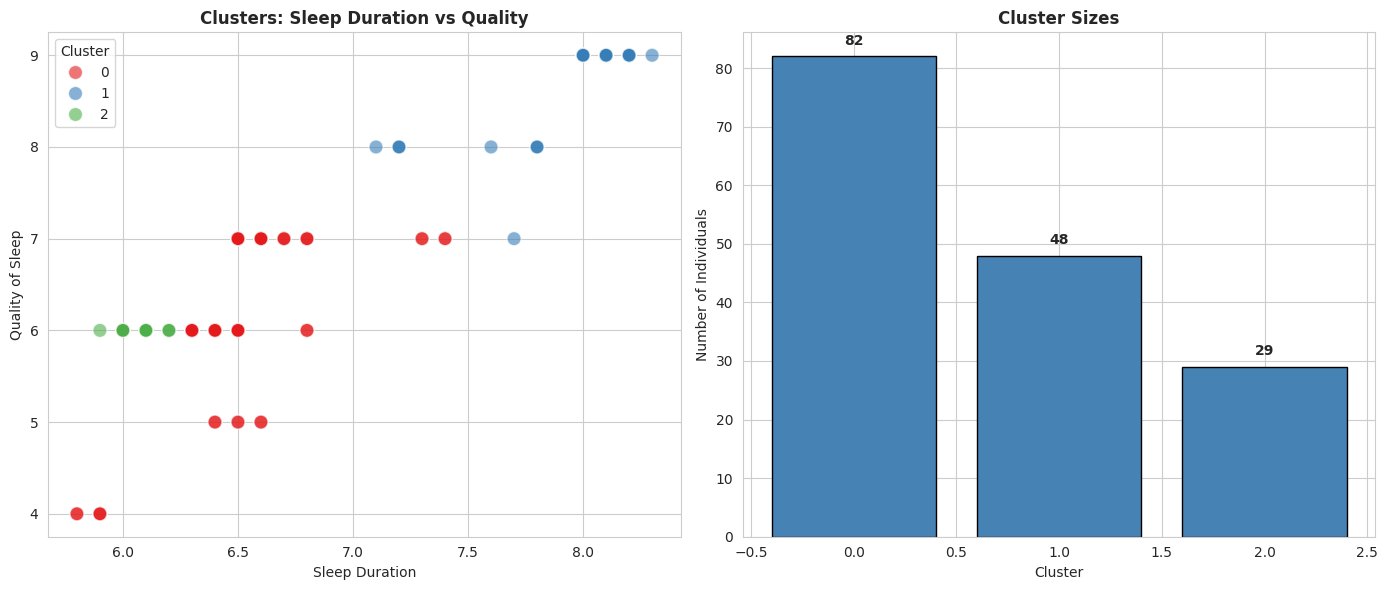


   Cluster Interpretation:

   Cluster 0 (n=82):
   - Sleep Duration: 6.50h
   - Sleep Quality: 6.24/10
   - Stress Level: 6.12/10
   - Physical Activity: 43.59 min/day
   - Most common disorder: Insomnia

   Cluster 1 (n=48):
   - Sleep Duration: 7.98h
   - Sleep Quality: 8.79/10
   - Stress Level: 3.40/10
   - Physical Activity: 74.48 min/day
   - Most common disorder: Sleep Apnea

   Cluster 2 (n=29):
   - Sleep Duration: 6.07h
   - Sleep Quality: 6.00/10
   - Stress Level: 8.00/10
   - Physical Activity: 90.00 min/day
   - Most common disorder: Sleep Apnea


In [ ]:
print("\n12. Clustering Analysis:")

# Select features for clustering
cluster_features = ['Sleep Duration', 'Quality of Sleep', 'Stress Level',
                   'Physical Activity Level']
X = df[cluster_features].dropna()

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find optimal number of clusters
inertias = []
silhouette_scores = []
K_range = range(2, 8)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot elbow and silhouette
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method for Optimal k', fontweight='bold')
axes[0].grid(True, alpha=0.3)

axes[1].plot(K_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
axes[1].set_xlabel('Number of Clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Analysis for Optimal k', fontweight='bold')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Apply optimal clustering (k=3 or 4 typically works well)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_cluster = df[df[cluster_features].notna().all(axis=1)].copy()
df_cluster['cluster'] = kmeans.fit_predict(X_scaled)

print(f"\n   - Optimal clusters: {optimal_k}")
print(f"   - Silhouette score: {silhouette_score(X_scaled, df_cluster['cluster']):.3f}")

# Cluster profiles
print("\n   Cluster Profiles:")
cluster_profiles = df_cluster.groupby('cluster')[cluster_features].mean()
display(cluster_profiles.round(2))

# Visualize clusters
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# 2D visualization
sns.scatterplot(x='Sleep Duration', y='Quality of Sleep', hue='cluster',
                data=df_cluster, palette='Set1', s=100, alpha=0.6, ax=axes[0])
axes[0].set_title('Clusters: Sleep Duration vs Quality', fontweight='bold')
axes[0].legend(title='Cluster')

# Cluster sizes
cluster_sizes = df_cluster['cluster'].value_counts().sort_index()
axes[1].bar(cluster_sizes.index, cluster_sizes.values, color='steelblue', edgecolor='black')
axes[1].set_xlabel('Cluster')
axes[1].set_ylabel('Number of Individuals')
axes[1].set_title('Cluster Sizes', fontweight='bold')
for i, v in enumerate(cluster_sizes.values):
    axes[1].text(i, v + 2, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Cluster interpretation
print("\n   Cluster Interpretation:")
for cluster_id in range(optimal_k):
    cluster_data = df_cluster[df_cluster['cluster'] == cluster_id]
    print(f"\n   Cluster {cluster_id} (n={len(cluster_data)}):")
    print(f"   - Sleep Duration: {cluster_data['Sleep Duration'].mean():.2f}h")
    print(f"   - Sleep Quality: {cluster_data['Quality of Sleep'].mean():.2f}/10")
    print(f"   - Stress Level: {cluster_data['Stress Level'].mean():.2f}/10")
    print(f"   - Physical Activity: {cluster_data['Physical Activity Level'].mean():.2f} min/day")

    # Most common characteristics
    if 'Sleep Disorder' in cluster_data.columns:
        top_disorder = cluster_data['Sleep Disorder'].mode()[0]
        print(f"   - Most common disorder: {top_disorder}")

Clusters reveal distinct patterns: Cluster 1 represents healthier sleep and lower stress, while Cluster 2 combines high stress with very high activity despite shorter sleep. Cluster 0 shows moderate sleep and stress, primarily associated with insomnia.